In [3]:
import IPython
import IPython.display as ipd

In [ ]:
from models import BiggerCNNLSTM
from data import VoxDataset, InputNormalizer
from hps import HPSVariant, HPSParser
from vb import Trainer, run_experiment

{'batch_size': 16, 'n_mfcc': 18, 'n_fft': 4096, 'conv1_channels': 1024, 'conv1_kernel_size': 13, 'conv2_channels': 1024, 'conv3_channels': 1024, 'hidden_size': 1024, 'dropout_lstm': 0.5, 'bidirectional': False, 'fc1': 1024, 'dropout_fc1': 0.4, 'fc2': 1024, 'dropout_fc2': 0.4, 'learning_rate': 0.001, 'gamma': 0.8}


100%|██████████| 25/25 [02:00<00:00,  4.84s/it]


62.84


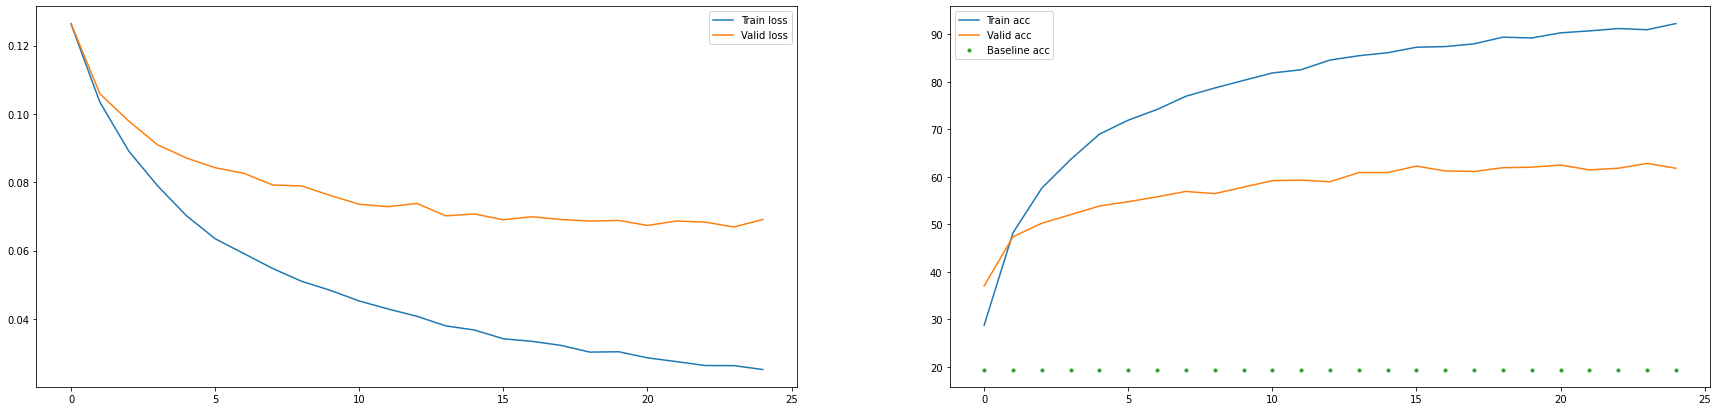

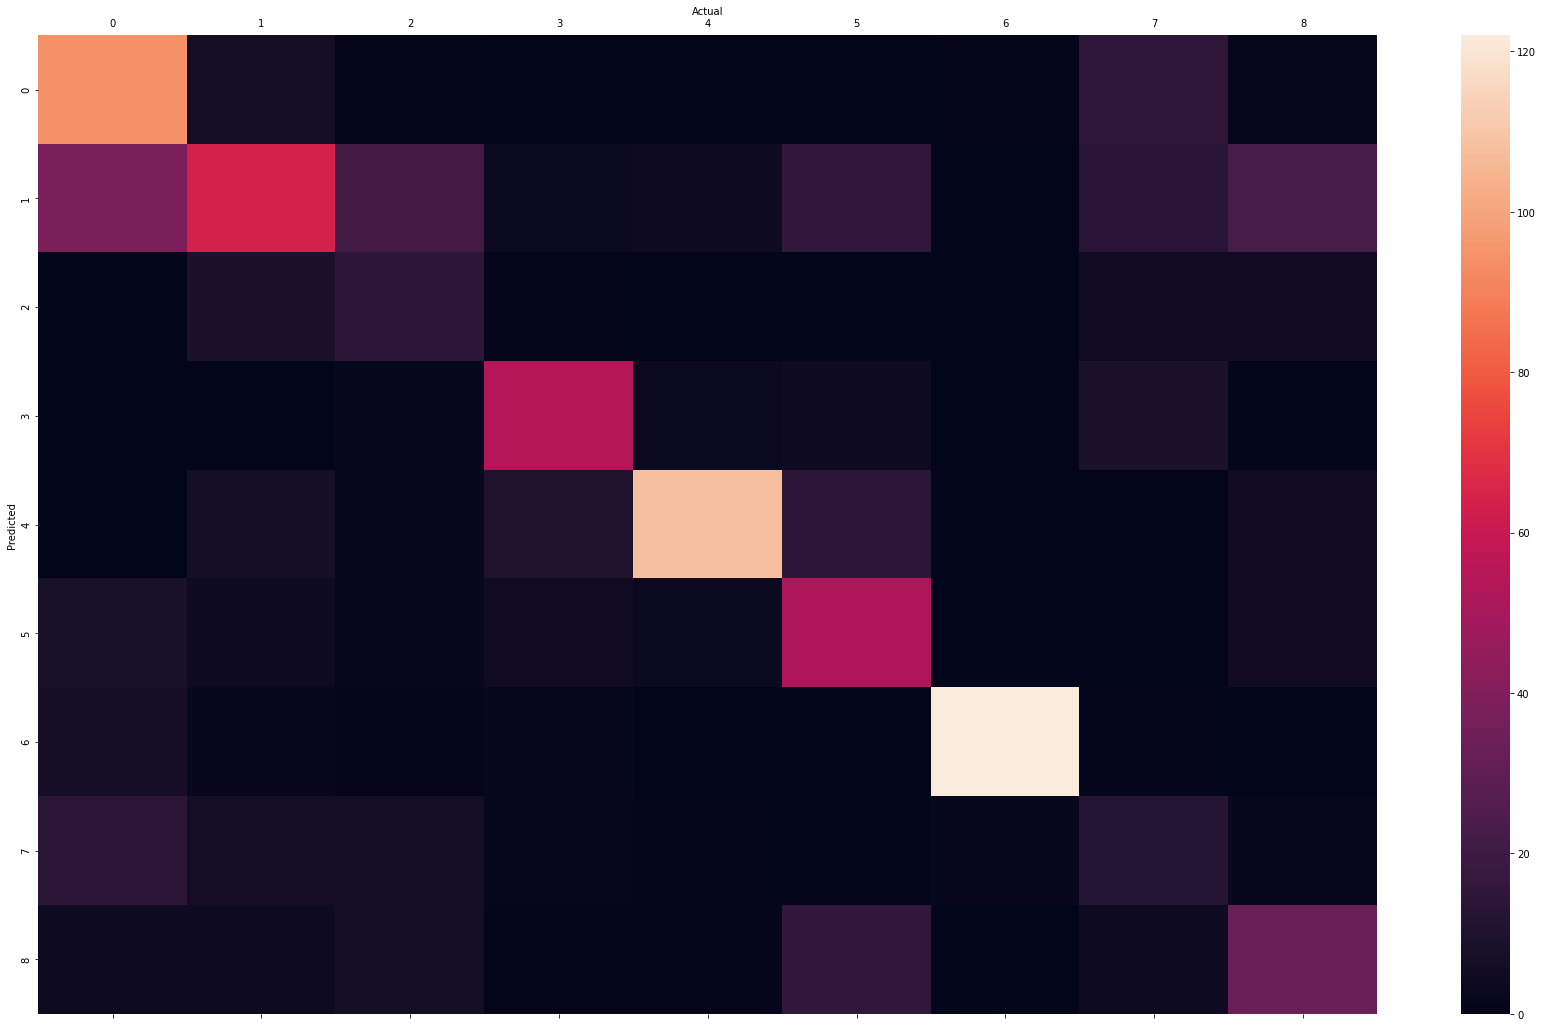

{'batch_size': 16, 'n_mfcc': 18, 'n_fft': 2048, 'conv1_channels': 1024, 'conv1_kernel_size': 9, 'conv2_channels': 512, 'conv3_channels': 512, 'hidden_size': 2048, 'dropout_lstm': 0.35, 'bidirectional': False, 'fc1': 512, 'dropout_fc1': 0.2, 'fc2': 512, 'dropout_fc2': 0.4, 'learning_rate': 0.01, 'gamma': 0.5}


100%|██████████| 25/25 [05:17<00:00, 12.71s/it]


65.34


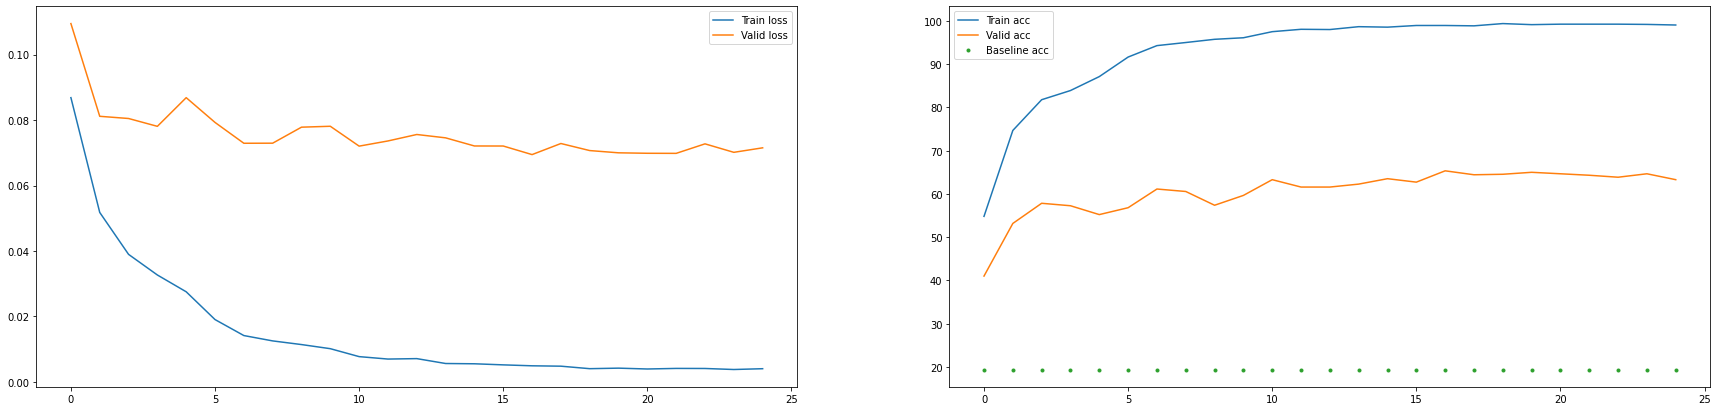

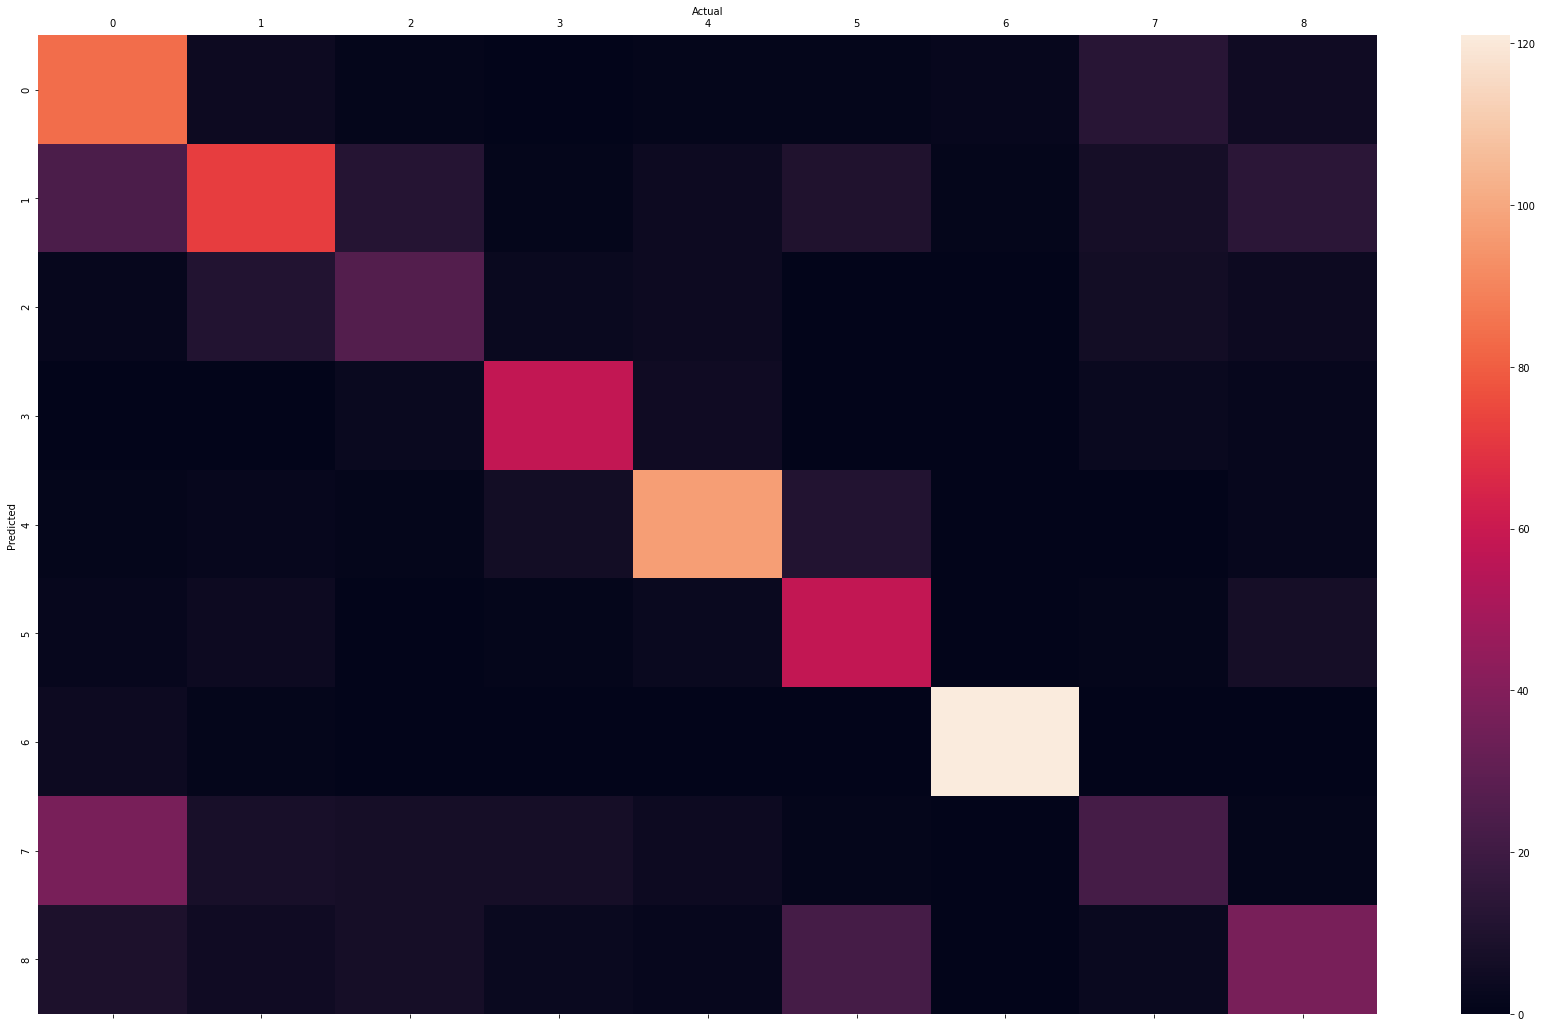

,batch_size,n_mfcc,n_fft,conv1_channels,conv1_kernel_size,conv2_channels,conv3_channels,hidden_size,dropout_lstm,bidirectional,...,dropout_fc1,fc2,dropout_fc2,learning_rate,gamma,Time,Loss,Best epoch,Accuracy (train),Accuracy
0,16,18,2048,1024,9,512,512,2048,0.35,False,...,0.2,512,0.4,0.010,0.5,26.6,0.0694,17,98.93,65.34
1,16,18,4096,1024,13,1024,1024,1024,0.50,False,...,0.4,1024,0.4,0.001,0.8,10.7,0.0669,24,91.00,62.84


In [15]:
trainer_config = {
    'data_path': '/storage/datasets/demo_10/',
    'cache_dir': '/storage/datasets/cache/',
    'annotate_cm': False,
    'equalize': True,
    'overwrite_cache': True,
    'device': 'cuda',
    'network': BiggerCNNLSTM,
    'loss': 'CrossEntropy',
    'batch_size': HPSVariant([16]),
    'preprocessing':
    {
        'n_mfcc': HPSVariant([18, 25]),
        'n_fft': HPSVariant([512, 1024, 2048, 4096]), 
        'hop_length': 512,
        'dct_type': 2,
        
    },
    'conv_layers': [
        [
            {
                'out_channels': HPSVariant([512, 1024], 'conv1_channels'),
                'kernel_size': HPSVariant([9, 13, 17, 21], 'conv1_kernel_size'),
                'stride': 1,
            },
            {'batch_norm': True}
        ],
        [
            {
                'out_channels': HPSVariant([512, 1024], 'conv2_channels'),
                'kernel_size': 9,
                'stride': 1,
            },
            {'batch_norm': True}
        ],
        [
            {
                'out_channels': HPSVariant([256, 512, 1024], 'conv3_channels'),
                'kernel_size': 5,
                'stride': 1,
            },
            {'batch_norm': True}
        ],
    ],
    'lstm':[
        {
            'hidden_size': HPSVariant([1024, 2048]),
            'num_layers': 2,
            'dropout': HPSVariant([0.35, 0.5], 'dropout_lstm'),
            'bidirectional': HPSVariant([False])
        },
        {'batch_norm': True}
    ],
    'fc_layers': [
        [HPSVariant([512, 1024], 'fc1'), True, HPSVariant([0.2, 0.4], 'dropout_fc1')], 
        [HPSVariant([512, 1024], 'fc2'), True, HPSVariant([0.2, 0.4], 'dropout_fc2')]
        ],
    'learning_rate': HPSVariant([0.01, 0.005, 0.001]),
    'scheduler': {'step_size': 5, 'gamma': HPSVariant([0.8, 0.5])},
    'num_folds': 5,
    'num_fold_trainings': 5,
    'num_hps_runs': 2,
    'num_epochs': 25,
    'drop_last': True
}
results = run_experiment(trainer_config)
results